In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
wcat = pd.read_csv('E:\\Simple Linear Regression\\wc-at.csv')

In [4]:
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [5]:
wcat.shape


(109, 2)

In [6]:
wcat.isna().any().sum()

0

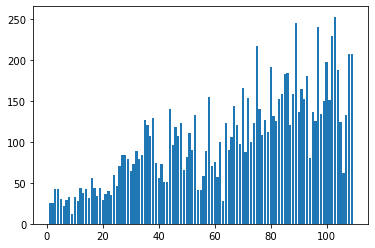

In [11]:
plt.bar(height=wcat.AT, x=np.arange(1,110,1))
plt.show()

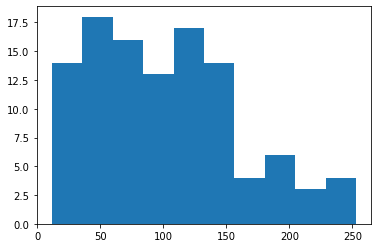

In [12]:
plt.hist(wcat.AT)
plt.show()

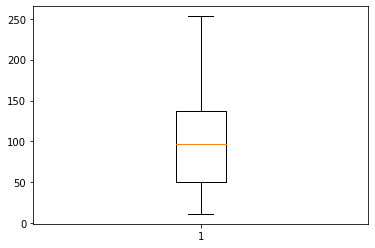

In [13]:
plt.boxplot(wcat.AT)
plt.show()

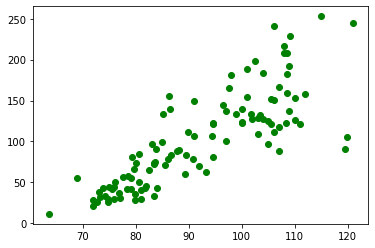

In [14]:
plt.scatter(x=wcat.Waist,y=wcat.AT,color='green')
plt.show()

In [15]:
np.corrcoef(wcat.Waist,wcat.AT)

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [16]:
import statsmodels.formula.api as smf

In [18]:
model = smf.ols('AT ~ Waist',data=wcat).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.62e-27
Time:                        08:07:30   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# model.summary2()

In [23]:
pred1 = model.predict(pd.DataFrame(wcat['Waist']))

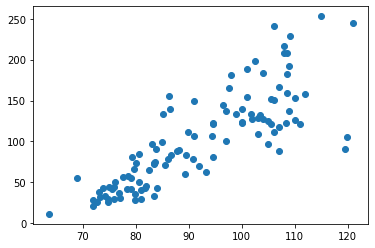

In [24]:
plt.scatter(wcat.Waist,wcat.AT)#regression line

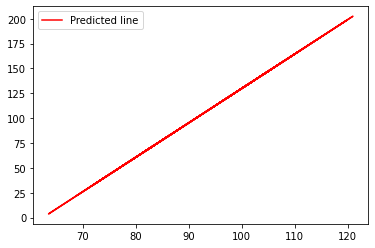

In [27]:
plt.plot(wcat.Waist,pred1,'r')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [28]:
#error calculation
res1 = wcat.AT - pred1

In [29]:
res1

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [30]:
res_sqr1 = res1 *res1

In [31]:
res_sqr1

0       283.863582
1        85.409091
2       593.078852
3       997.912810
4       153.322979
          ...     
104      39.066715
105    1982.929211
106       9.799393
107    2577.649718
108    2371.226781
Length: 109, dtype: float64

In [32]:
mse1 = np.mean(res_sqr1)

In [33]:
mse1

1073.229229553382

In [34]:
rmse1 = np.sqrt(mse1)

In [35]:
rmse1

32.76017749575515

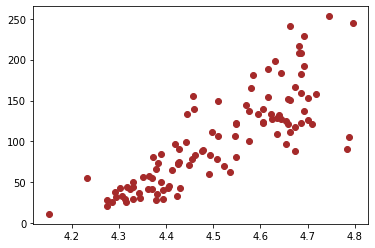

In [36]:
#model building on trnsformed data
plt.scatter(x = np.log(wcat['Waist']), y = wcat['AT'], color = 'brown')


In [37]:
np.corrcoef(np.log(wcat.Waist), wcat.AT) #correlation

array([[1.        , 0.82177819],
       [0.82177819, 1.        ]])

In [39]:
model2 = smf.ols('AT ~ np.log(Waist)',data=wcat).fit()

In [41]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           6.80e-28
Time:                        08:25:45   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))

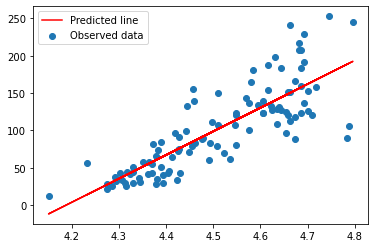

In [55]:
# Regression Line
plt.scatter(np.log(wcat.Waist), wcat.AT)
plt.plot(np.log(wcat.Waist), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [45]:
# Error calculation
res2 = wcat.AT - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

32.49688490932126

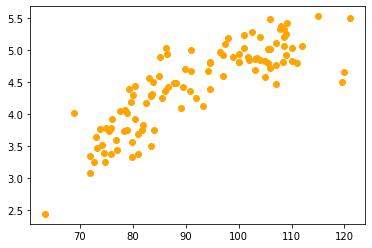

In [46]:
#exponential transformation
plt.scatter(x=wcat.Waist,y=np.log(wcat.AT),color='orange')

In [47]:
np.corrcoef(wcat.Waist,np.log(wcat.AT)) #correlation

array([[1.        , 0.84090069],
       [0.84090069, 1.        ]])

In [48]:
model3 = smf.ols('np.log(AT)~Waist',data=wcat).fit()

In [50]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.68e-30
Time:                        08:35:27   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
pred3 = model3.predict(pd.DataFrame(wcat.Waist))

In [52]:
pred3_at = np.exp(pred3)

In [53]:
pred3_at

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

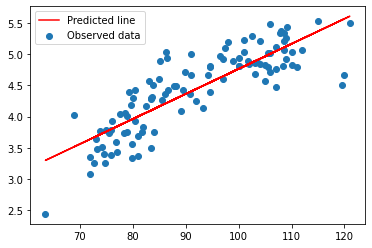

In [54]:
# Regression Line
plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(wcat.Waist, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [58]:
# Error calculation
res3 = wcat.AT - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

38.52900175807141

In [59]:
mse3

1484.48397647347

In [61]:
#polynomial distribution
model4 = smf.ols('np.log(AT) ~ Waist+ I(Waist*Waist)',data=wcat).fit()

In [62]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.80e-35
Time:                        08:42:48   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist                0.2289      0.032      7.107      0.000       0.165       0.293
I(Waist * Waist)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [64]:
#regression line
from sklearn.preprocessing import PolynomialFeatures

In [65]:
poly_reg = PolynomialFeatures(degree=2)

In [66]:
X = wcat.iloc[:,0:1].values

In [67]:
X

array([[ 74.75],
       [ 72.6 ],
       [ 81.8 ],
       [ 83.95],
       [ 74.65],
       [ 71.85],
       [ 80.9 ],
       [ 83.4 ],
       [ 63.5 ],
       [ 73.2 ],
       [ 71.9 ],
       [ 75.  ],
       [ 73.1 ],
       [ 79.  ],
       [ 77.  ],
       [ 68.85],
       [ 75.95],
       [ 74.15],
       [ 73.8 ],
       [ 75.9 ],
       [ 76.85],
       [ 80.9 ],
       [ 79.9 ],
       [ 89.2 ],
       [ 82.  ],
       [ 92.  ],
       [ 86.6 ],
       [ 80.5 ],
       [ 86.  ],
       [ 82.5 ],
       [ 83.5 ],
       [ 88.1 ],
       [ 90.8 ],
       [ 89.4 ],
       [102.  ],
       [ 94.5 ],
       [ 91.  ],
       [103.  ],
       [ 80.  ],
       [ 79.  ],
       [ 83.5 ],
       [ 76.  ],
       [ 80.5 ],
       [ 86.5 ],
       [ 83.  ],
       [107.1 ],
       [ 94.3 ],
       [ 94.5 ],
       [ 79.7 ],
       [ 79.3 ],
       [ 89.8 ],
       [ 83.8 ],
       [ 85.2 ],
       [ 75.5 ],
       [ 78.4 ],
       [ 78.6 ],
       [ 87.8 ],
       [ 86.3 ],
       [ 85.5 

In [68]:
X_poly = poly_reg.fit_transform(X)

In [69]:
X_poly

array([[1.0000000e+00, 7.4750000e+01, 5.5875625e+03],
       [1.0000000e+00, 7.2600000e+01, 5.2707600e+03],
       [1.0000000e+00, 8.1800000e+01, 6.6912400e+03],
       [1.0000000e+00, 8.3950000e+01, 7.0476025e+03],
       [1.0000000e+00, 7.4650000e+01, 5.5726225e+03],
       [1.0000000e+00, 7.1850000e+01, 5.1624225e+03],
       [1.0000000e+00, 8.0900000e+01, 6.5448100e+03],
       [1.0000000e+00, 8.3400000e+01, 6.9555600e+03],
       [1.0000000e+00, 6.3500000e+01, 4.0322500e+03],
       [1.0000000e+00, 7.3200000e+01, 5.3582400e+03],
       [1.0000000e+00, 7.1900000e+01, 5.1696100e+03],
       [1.0000000e+00, 7.5000000e+01, 5.6250000e+03],
       [1.0000000e+00, 7.3100000e+01, 5.3436100e+03],
       [1.0000000e+00, 7.9000000e+01, 6.2410000e+03],
       [1.0000000e+00, 7.7000000e+01, 5.9290000e+03],
       [1.0000000e+00, 6.8850000e+01, 4.7403225e+03],
       [1.0000000e+00, 7.5950000e+01, 5.7684025e+03],
       [1.0000000e+00, 7.4150000e+01, 5.4982225e+03],
       [1.0000000e+00, 7.380

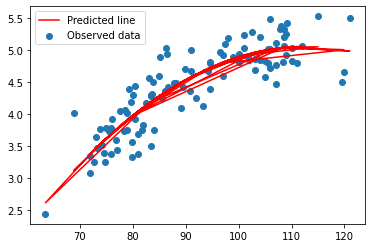

In [70]:
plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [71]:
# Error calculation
res4 = wcat.AT - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

32.244447827762095

In [72]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse


,MODEL,RMSE
0,SLR,32.760177
1,Log model,32.496885
2,Exp model,38.529002
3,Poly model,32.244448


In [73]:
#best model
from sklearn.model_selection import train_test_split
train,test = train_test_split(wcat,test_size=0.2)



In [74]:
final_model = smf.ols('np.log(AT)~Waist + I(Waist*Waist)',data=wcat).fit()

In [76]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           1.80e-35
Time:                        08:52:41   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist                0.2289      0.032      7.107      0.000       0.165       0.293
I(Waist * Waist)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# Predict on test data
test_pred = final_model.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT


45    152.932757
64    150.036699
98     98.166004
33     91.269807
27     55.349922
24     60.901036
16     40.277322
29     62.808612
20     43.034658
83    157.645795
57     78.091817
17     35.107507
82    156.625326
41     40.427511
90    125.093851
53     38.941580
89    155.642311
52     73.542120
77    146.290109
99    142.179763
85    146.290109
93    113.052967
dtype: float64

In [79]:
# Model Evaluation on Test data
test_res = test.AT - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse


34.444638832228215

In [81]:
# Prediction on train data
train_pred = final_model.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

14     43.505263
69    152.760410
10     29.295590
91    149.832482
71    137.554384
         ...    
61     72.317089
11     37.491210
78    150.878818
1      31.026570
3      68.488132
Length: 87, dtype: float64

In [82]:
# Model Evaluation on train data
train_res = train.AT - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse


31.663868988145502